# SVD

## Trabajando con una imagen a color

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from numpy.linalg import svd
from matplotlib.pyplot import imshow
from skimage.io import imread
from PIL import Image

/home/julieta/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


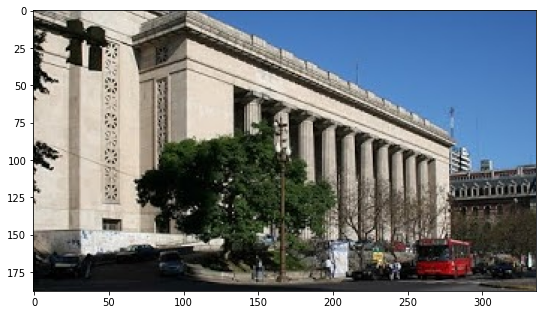

In [12]:
# obtenemos la imagen para poder trabajarla
# 336 x 188
img = imread('fiuba.jpg')
plt.figure(figsize=(9, 6))
plt.imshow(img);

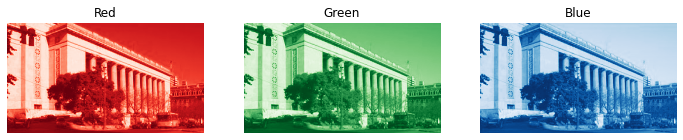

In [13]:
# Split the picture into Red, Green and Blue
pic_r = img[:, :, 0]
pic_g = img[:, :, 1]
pic_b = img[:, :, 2]

# Picture the data obtained
fig, axes = plt.subplots(1, 3)

axes[0].imshow(pic_r, cmap="Reds_r")
axes[0].axis('off')
axes[0].set_title('Red')

axes[1].imshow(pic_g, cmap="Greens_r")
axes[1].axis('off')
axes[1].set_title('Green')

axes[2].imshow(pic_b, cmap="Blues_r")
axes[2].axis('off')
axes[2].set_title('Blue')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

In [14]:
# SVD decomposition for Red, Green and Blue
U_r, s_r, VT_r = svd(pic_r, full_matrices=False)
U_g, s_g, VT_g = svd(pic_g, full_matrices=False)
U_b, s_b, VT_b = svd(pic_b, full_matrices=False)

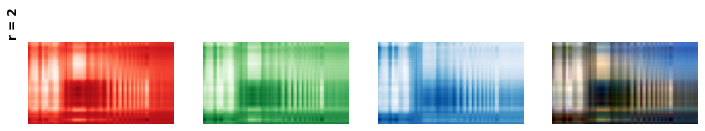

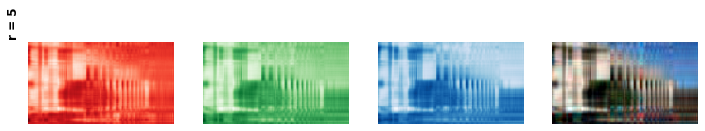

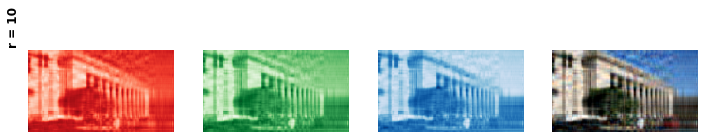

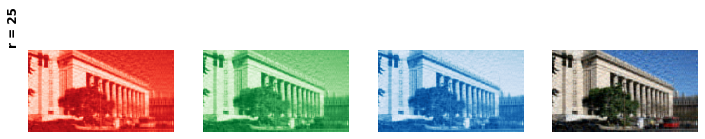

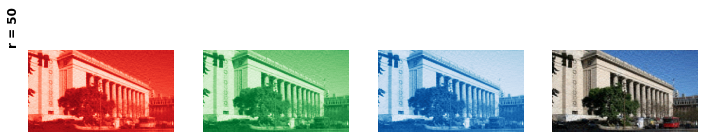

In [15]:
for r in 2, 5, 10, 25, 50:
    # r is the number of singular values used

    # Restoring the image
    pic_reduce_r = U_r[:, :r] @ np.diag(s_r[:r]) @ VT_r[:r, :]
    pic_reduce_g = U_g[:, :r] @ np.diag(s_g[:r]) @ VT_g[:r, :]
    pic_reduce_b = U_b[:, :r] @ np.diag(s_b[:r]) @ VT_b[:r, :]

    fig, axes = plt.subplots(1, 4)

    axes[0].imshow(pic_reduce_r, cmap="Reds_r")
    axes[0].axis('off')
    axes[0].set_title('r = ' + str(r), rotation="vertical",
                      position=(-.1, .42), fontweight='bold')

    axes[1].imshow(pic_reduce_g, cmap="Greens_r")
    axes[1].axis('off')

    axes[2].imshow(pic_reduce_b, cmap="Blues_r")
    axes[2].axis('off')

    pic_reduce_rgb = np.stack(
        [pic_reduce_r, pic_reduce_g, pic_reduce_b], axis=2)
    # Crop values to the range [0, 255]
    pic_reduce_rgb[pic_reduce_rgb < 0.] = 0
    pic_reduce_rgb[pic_reduce_rgb > 255.] = 255

    axes[3].imshow(pic_reduce_rgb.astype('uint8'))
    axes[3].axis('off')

    fig.set_figwidth(12)
    fig.set_figheight(6)

    plt.show()